In [1]:
import warnings as En_Offen_span__w
En_Offen_span__w.filterwarnings("ignore")
import pandas as En_Offen_span__N

In [2]:
####### English offensive language
En_Offen_span_1 = En_Offen_span__N.read_csv('English_final.csv')
En_Offen_span_1

,tweet,hate/offensive
0,rt mayasolov woman complain clean hous amp man...,0
1,rt mleew boy dat cold tyga dwn bad cuffin dat ...,1
2,rt urkindofbrand dawg rt sbabi life ever fuck ...,1
3,rt c g anderson viva base look like tranni,1
4,rt shenikarobert shit hear might true might fa...,1
...,...,...
24778,muthaf lie lifeask pearl corey emanuel right t...,1
24779,gone broke wrong heart babi drove redneck crazi,0
24780,young buck wanna eat dat nigguh like aint fuck...,1
24781,youu got wild bitch tellin lie,1


In [3]:
En_Offen_span_1['hate/offensive'].value_counts()

1    20620
0     4163
Name: hate/offensive, dtype: int64

In [4]:
from sklearn.feature_extraction.text import CountVectorizer as En_Offen_span_1tf

En_Offen_span_1zer = En_Offen_span_1tf(analyzer='word', ngram_range= (1,1))
En_Offen_span_1x = En_Offen_span_1zer.fit_transform(En_Offen_span_1['tweet'].values.astype('U')).toarray()

In [5]:
En_Offen_span_1x.shape

(24783, 30396)

In [6]:
En_Offen_span_1y = En_Offen_span_1['hate/offensive']

In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler as En_Offen_span_1run
from collections import Counter as En_Offen_span_1cn
print('Original En_Offen_span_1 datashape %s' % En_Offen_span_1cn(En_Offen_span_1y))
En_Offen_span_1ml = En_Offen_span_1run()
En_Offen_span_1x, En_Offen_span_1y = En_Offen_span_1ml.fit_resample(En_Offen_span_1x, En_Offen_span_1y)
print('Resampled En_Offen_span_1 datashape %s' % En_Offen_span_1cn(En_Offen_span_1y))

Original En_Offen_span_1 datashape Counter({1: 20620, 0: 4163})
Resampled En_Offen_span_1 datashape Counter({0: 4163, 1: 4163})


In [8]:
En_Offen_span_1x.shape

(8326, 30396)

In [9]:
En_Offen_span_1y.shape

(8326,)

In [10]:
from sklearn.model_selection import train_test_split as En_Offen_span_1trs

En_tssi =0.4
En_rast = 40
En_tssi1 =0.5

En_Offen_span_1xr, En_Offen_span_1xe, En_Offen_span_1yr, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1x, En_Offen_span_1y, test_size=En_tssi, random_state= En_rast)
En_Offen_span_1xd, En_Offen_span_1xe, En_Offen_span_1yd, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1xe, En_Offen_span_1ye, test_size= En_tssi1, random_state= En_rast)

print(En_Offen_span_1xr.shape)
print(En_Offen_span_1xd.shape)
print(En_Offen_span_1xe.shape)

(4995, 30396)
(1665, 30396)
(1666, 30396)


# ML Algorithim

In [11]:
from sklearn.metrics import classification_report as En_Offen_span_1cffr
from sklearn.metrics import confusion_matrix as En_Offen_span_1cfmt
from sklearn.metrics import ConfusionMatrixDisplay as En_Offen_span_1cmxd
from sklearn.model_selection import GridSearchCV as En_Offen_span_1grdsh
import time as En_Offen_span_1tiim

# DecisionTree

In [12]:
from sklearn.tree import DecisionTreeClassifier as En_Offen_span_1dsne

En_Hypm = { 'max_features': ['log2','sqrt',None],
               'criterion': ['entropy','gini','log_loss'],
               'splitter':['best','random']}


En_Hypm_vsb = En_Offen_span_1dsne(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START criterion=entropy, max_features=log2, splitter=best........
[CV 1/2; 1/18] END criterion=entropy, max_features=log2, splitter=best;, score=0.672 total time=   0.4s
[CV 2/2; 1/18] START criterion=entropy, max_features=log2, splitter=best........
[CV 2/2; 1/18] END criterion=entropy, max_features=log2, splitter=best;, score=0.668 total time=   0.1s
[CV 1/2; 2/18] START criterion=entropy, max_features=log2, splitter=random......
[CV 1/2; 2/18] END criterion=entropy, max_features=log2, splitter=random;, score=0.620 total time=   0.1s
[CV 2/2; 2/18] START criterion=entropy, max_features=log2, splitter=random......
[CV 2/2; 2/18] END criterion=entropy, max_features=log2, splitter=random;, score=0.692 total time=   0.3s
[CV 1/2; 3/18] START criterion=entropy, max_features=sqrt, splitter=best........
[CV 1/2; 3/18] END criterion=entropy, max_features=sqrt, splitter=best;, score=0.800 total time=   0.2s
[CV 2/2; 3


 training duration: 170.2277946472168 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       799
           1       0.96      0.93      0.95       866

    accuracy                           0.94      1665
   macro avg       0.94      0.95      0.94      1665
weighted avg       0.95      0.94      0.94      1665


 validation duration: 8.592062950134277 



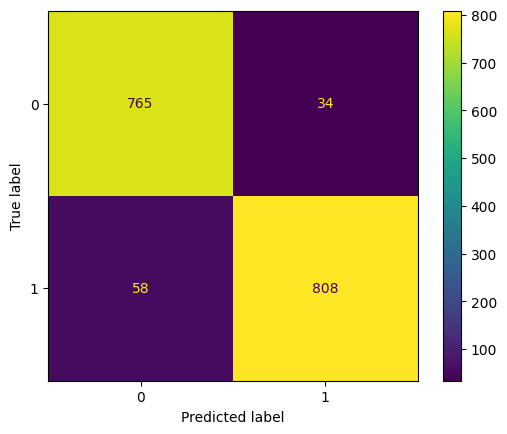

In [13]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdA= En_Offen_span_1dsne(**En_Hypm_vsb.best_params_)
En_Offen_span_MdA.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdA.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

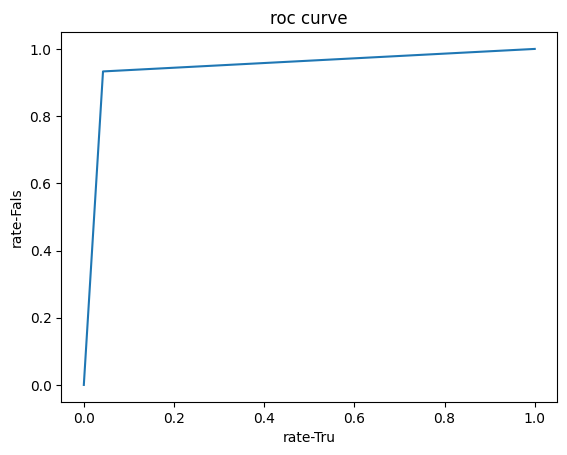

auc- curve: 0.9452361063338411


In [14]:
from sklearn.metrics import roc_curve as En_Offen_span_rc
from sklearn.metrics import roc_auc_score as En_Offen_span_ac
import matplotlib.pyplot as En_Offen_span_mt

En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       812
           1       0.95      0.94      0.95       854

    accuracy                           0.95      1666
   macro avg       0.95      0.95      0.95      1666
weighted avg       0.95      0.95      0.95      1666


 testing duration: 0.585331916809082 



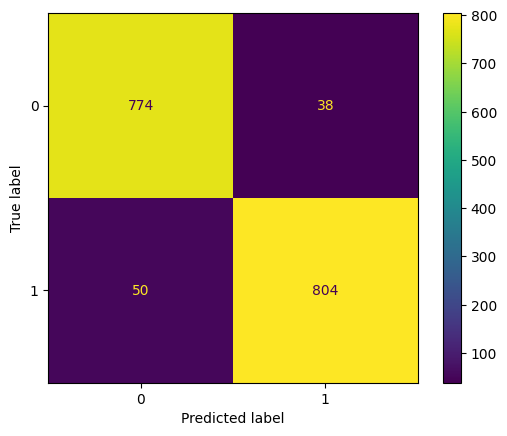

In [15]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdA.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

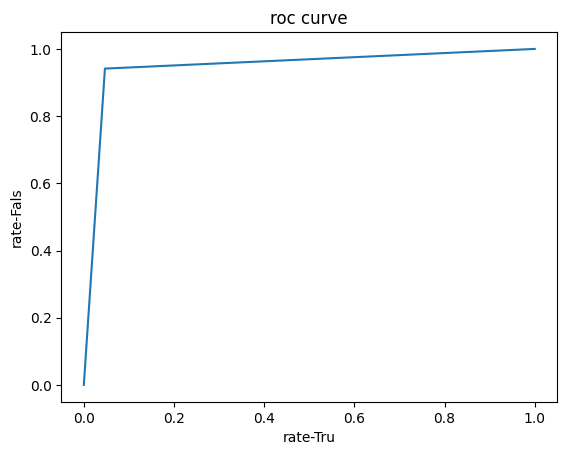

auc- curve: 0.9473269805378342


In [16]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# SVM

In [17]:
from sklearn.svm import SVC as En_Offen_span_1spv

En_Hypm = { 'kernel': ['sigmoid','poly','rbg','linear'],
               'gamma': ['auto','scale'],
               'degree':[2,3,4,5,6,7]}


En_Hypm_vsb = En_Offen_span_1spv(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 1/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.520 total time=  25.2s
[CV 2/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 2/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.516 total time=  21.2s
[CV 1/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 1/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.520 total time=  16.2s
[CV 2/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 2/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.516 total time=  20.8s
[CV 1/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 1/2; 3/48] END degree=2, gamma=auto, kernel=rbg;, score=nan total time=   0.1s
[CV 2/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 2/2; 3/48] END d

[CV 1/2; 25/48] END degree=5, gamma=auto, kernel=sigmoid;, score=0.520 total time=  19.4s
[CV 2/2; 25/48] START degree=5, gamma=auto, kernel=sigmoid......................
[CV 2/2; 25/48] END degree=5, gamma=auto, kernel=sigmoid;, score=0.516 total time=  24.0s
[CV 1/2; 26/48] START degree=5, gamma=auto, kernel=poly.........................
[CV 1/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.520 total time=  19.0s
[CV 2/2; 26/48] START degree=5, gamma=auto, kernel=poly.........................
[CV 2/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.516 total time=  20.5s
[CV 1/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 1/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 2/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 1/2; 28/48] START degree=5, gamma=auto, kernel=linear................


 training duration: 132.8167598247528 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       799
           1       0.96      0.91      0.93       866

    accuracy                           0.93      1665
   macro avg       0.93      0.93      0.93      1665
weighted avg       0.93      0.93      0.93      1665


 validation duration: 164.91626048088074 



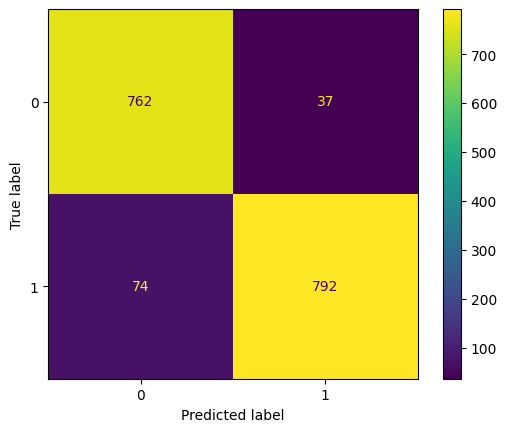

In [18]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdB= En_Offen_span_1spv(**En_Hypm_vsb.best_params_)
En_Offen_span_MdB.fit(En_Offen_span_1xr[:1000], En_Offen_span_1yr[:1000])

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

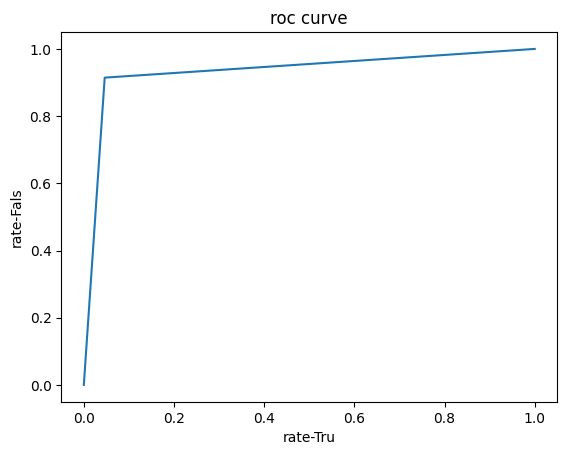

auc- curve: 0.9341208843618033


In [19]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       812
           1       0.96      0.92      0.94       854

    accuracy                           0.94      1666
   macro avg       0.94      0.94      0.94      1666
weighted avg       0.94      0.94      0.94      1666


 testing duration: 154.11870312690735 



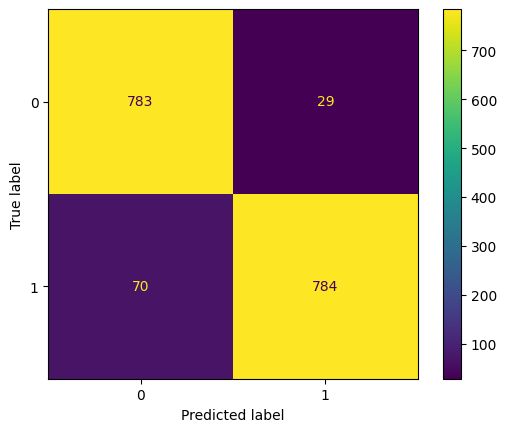

In [20]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

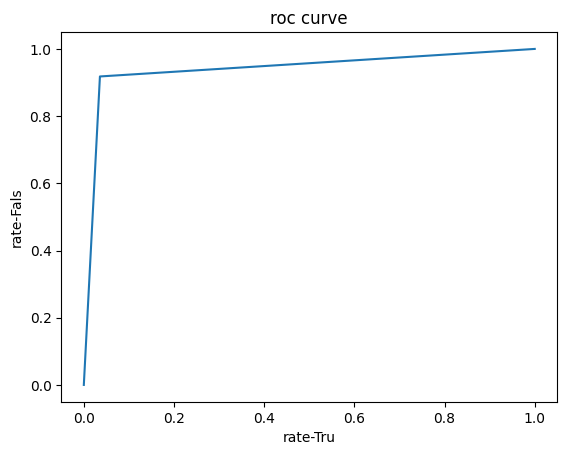

auc- curve: 0.9411592505854802


In [21]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB as En_Offen_span_1nvb

En_Hypm = { 'var_smoothing': [1e-9,1e-10,1e-11,1e-12,1e-13]}


En_Hypm_vsb = En_Offen_span_1nvb()
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START var_smoothing=1e-09.........................................
[CV 1/2; 1/5] END ..........var_smoothing=1e-09;, score=0.760 total time=   1.1s
[CV 2/2; 1/5] START var_smoothing=1e-09.........................................
[CV 2/2; 1/5] END ..........var_smoothing=1e-09;, score=0.776 total time=   2.3s
[CV 1/2; 2/5] START var_smoothing=1e-10.........................................
[CV 1/2; 2/5] END ..........var_smoothing=1e-10;, score=0.760 total time=   2.1s
[CV 2/2; 2/5] START var_smoothing=1e-10.........................................
[CV 2/2; 2/5] END ..........var_smoothing=1e-10;, score=0.776 total time=   1.7s
[CV 1/2; 3/5] START var_smoothing=1e-11.........................................
[CV 1/2; 3/5] END ..........var_smoothing=1e-11;, score=0.760 total time=   1.8s
[CV 2/2; 3/5] START var_smoothing=1e-11.........................................
[CV 2/2; 3/5] END ..........var_smoothing=1e-11;,


 training duration: 13.039955854415894 

              precision    recall  f1-score   support

           0       0.76      0.58      0.66       799
           1       0.68      0.83      0.75       866

    accuracy                           0.71      1665
   macro avg       0.72      0.70      0.70      1665
weighted avg       0.72      0.71      0.70      1665


 validation duration: 4.22106671333313 



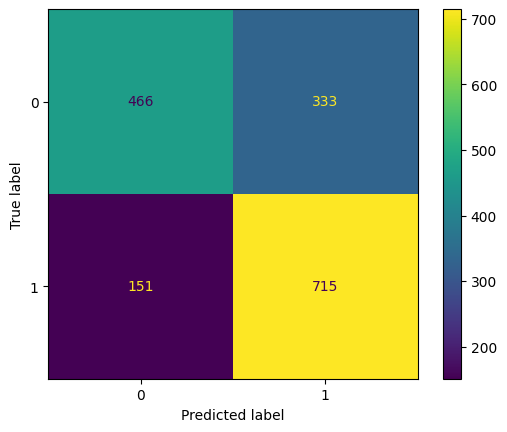

In [23]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdC= En_Offen_span_1nvb(**En_Hypm_vsb.best_params_)
En_Offen_span_MdC.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdC.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

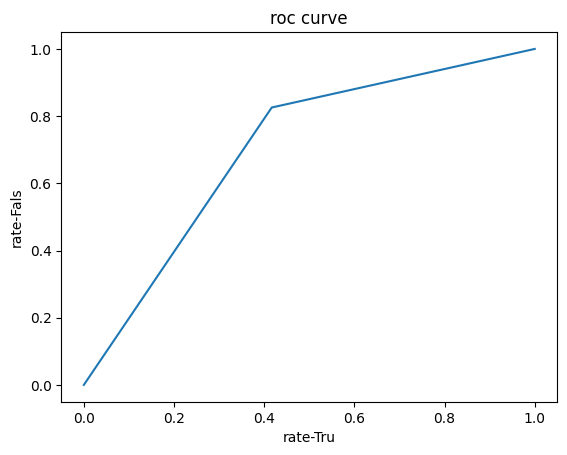

auc- curve: 0.7044320701107329


In [24]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67       812
           1       0.68      0.85      0.76       854

    accuracy                           0.72      1666
   macro avg       0.73      0.71      0.71      1666
weighted avg       0.73      0.72      0.71      1666


 testing duration: 6.572194337844849 



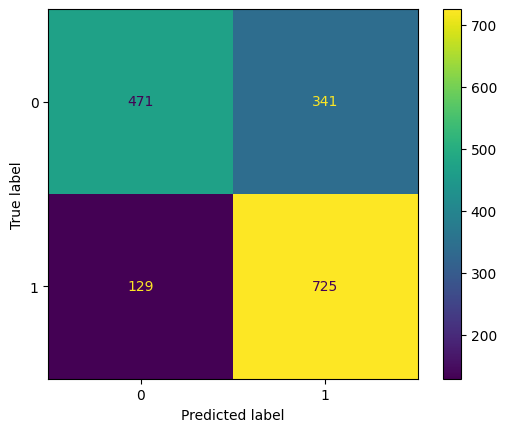

In [25]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdC.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

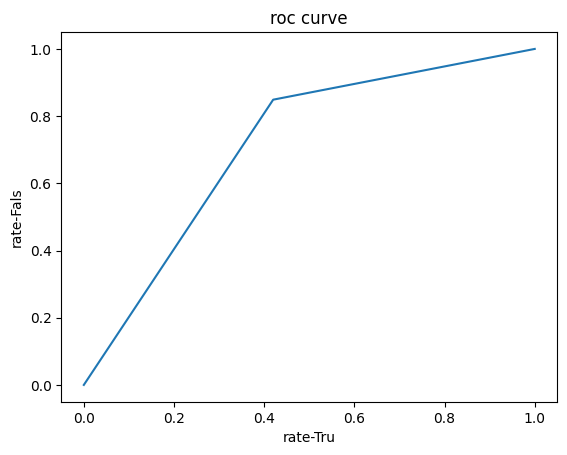

auc- curve: 0.7144976984575628


In [26]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier as En_Offen_span_1ads

En_Hypm = { 'algorithm': ['SAMME.R','SAMME'],
               'learning_rate': [1.0,2.0,3.0,4.0,5.0],
               'n_estimators':[40,50,60,70,80]}


En_Hypm_vsb = En_Offen_span_1ads(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2; 1/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=40......
[CV 1/2; 1/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.936 total time=  33.1s
[CV 2/2; 1/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=40......
[CV 2/2; 1/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40;, score=0.940 total time=  35.1s
[CV 1/2; 2/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=50......
[CV 1/2; 2/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.936 total time=  42.1s
[CV 2/2; 2/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=50......
[CV 2/2; 2/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50;, score=0.948 total time=  42.8s
[CV 1/2; 3/50] START algorithm=SAMME.R, learning_rate=1.0, n_estimators=60......
[CV 1/2; 3/50] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=60;, score=0.920 total time=  54.2s
[CV

[CV 2/2; 22/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=50;, score=0.548 total time=  47.5s
[CV 1/2; 23/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=60.....
[CV 1/2; 23/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=60;, score=0.496 total time= 1.0min
[CV 2/2; 23/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=60.....
[CV 2/2; 23/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=60;, score=0.548 total time=  48.1s
[CV 1/2; 24/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=70.....
[CV 1/2; 24/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=70;, score=0.496 total time= 1.3min
[CV 2/2; 24/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=70.....
[CV 2/2; 24/50] END algorithm=SAMME.R, learning_rate=5.0, n_estimators=70;, score=0.548 total time= 1.0min
[CV 1/2; 25/50] START algorithm=SAMME.R, learning_rate=5.0, n_estimators=80.....
[CV 1/2; 25/50] END algorithm=SAMME.R, learning_rate=5.0, n_

[CV 2/2; 44/50] END algorithm=SAMME, learning_rate=4.0, n_estimators=70;, score=0.548 total time= 1.3min
[CV 1/2; 45/50] START algorithm=SAMME, learning_rate=4.0, n_estimators=80.......
[CV 1/2; 45/50] END algorithm=SAMME, learning_rate=4.0, n_estimators=80;, score=0.852 total time= 1.4min
[CV 2/2; 45/50] START algorithm=SAMME, learning_rate=4.0, n_estimators=80.......
[CV 2/2; 45/50] END algorithm=SAMME, learning_rate=4.0, n_estimators=80;, score=0.844 total time= 1.4min
[CV 1/2; 46/50] START algorithm=SAMME, learning_rate=5.0, n_estimators=40.......
[CV 1/2; 46/50] END algorithm=SAMME, learning_rate=5.0, n_estimators=40;, score=0.496 total time=  42.4s
[CV 2/2; 46/50] START algorithm=SAMME, learning_rate=5.0, n_estimators=40.......
[CV 2/2; 46/50] END algorithm=SAMME, learning_rate=5.0, n_estimators=40;, score=0.548 total time=  38.2s
[CV 1/2; 47/50] START algorithm=SAMME, learning_rate=5.0, n_estimators=50.......
[CV 1/2; 47/50] END algorithm=SAMME, learning_rate=5.0, n_estimators=5


 training duration: 1056.522986650467 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       799
           1       0.97      0.92      0.94       866

    accuracy                           0.94      1665
   macro avg       0.94      0.94      0.94      1665
weighted avg       0.94      0.94      0.94      1665


 validation duration: 33.99254488945007 



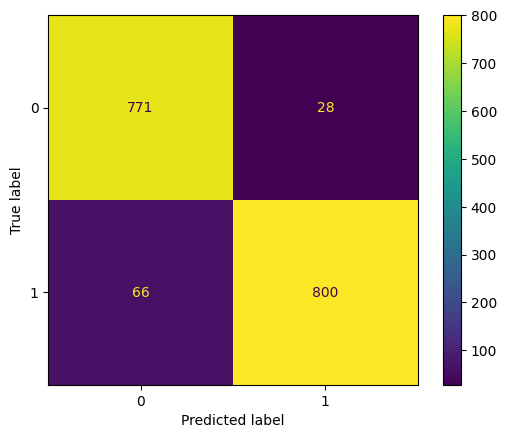

In [28]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdD= En_Offen_span_1ads(**En_Hypm_vsb.best_params_)
En_Offen_span_MdD.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdD.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

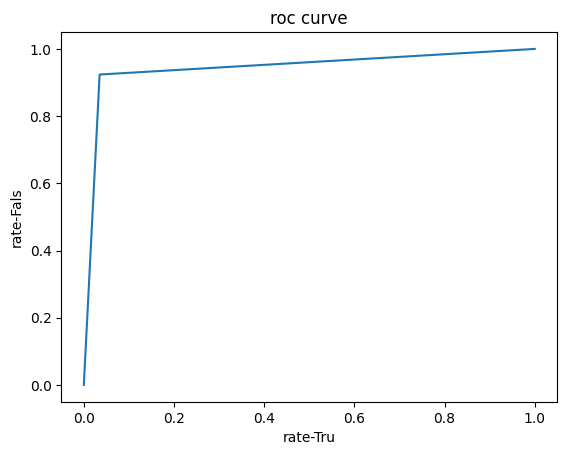

auc- curve: 0.9443718620562076


In [29]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       812
           1       0.96      0.93      0.95       854

    accuracy                           0.95      1666
   macro avg       0.95      0.95      0.95      1666
weighted avg       0.95      0.95      0.95      1666


 testing duration: 34.4959774017334 



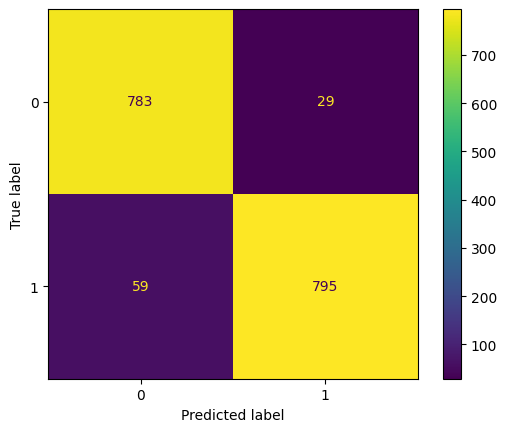

In [30]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdD.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

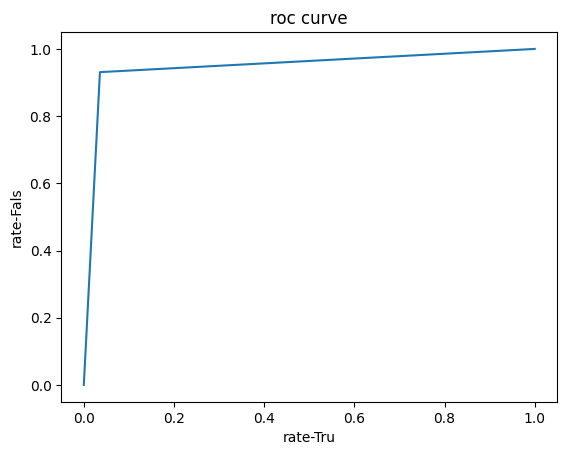

auc- curve: 0.947599531615925


In [31]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))

# XgBoost

In [32]:
from xgboost import XGBClassifier as En_Offen_span_1etg

En_Hypm = { 'n_estimators': [20,40,60,80],
               'subsample': [0.01,0.04,0.06,0.09],
               'learning_rate':[0.1,0.3,0.5,0.7]}


En_Hypm_vsb = En_Offen_span_1etg(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START learning_rate=0.1, n_estimators=20, subsample=0.01.........
[CV 1/2; 1/64] END learning_rate=0.1, n_estimators=20, subsample=0.01;, score=0.520 total time=   5.7s
[CV 2/2; 1/64] START learning_rate=0.1, n_estimators=20, subsample=0.01.........
[CV 2/2; 1/64] END learning_rate=0.1, n_estimators=20, subsample=0.01;, score=0.516 total time=   2.0s
[CV 1/2; 2/64] START learning_rate=0.1, n_estimators=20, subsample=0.04.........
[CV 1/2; 2/64] END learning_rate=0.1, n_estimators=20, subsample=0.04;, score=0.852 total time=   4.5s
[CV 2/2; 2/64] START learning_rate=0.1, n_estimators=20, subsample=0.04.........
[CV 2/2; 2/64] END learning_rate=0.1, n_estimators=20, subsample=0.04;, score=0.516 total time=   8.2s
[CV 1/2; 3/64] START learning_rate=0.1, n_estimators=20, subsample=0.06.........
[CV 1/2; 3/64] END learning_rate=0.1, n_estimators=20, subsample=0.06;, score=0.848 total time=   7.3s
[CV 2/2; 3/64] STA

[CV 1/2; 23/64] END learning_rate=0.3, n_estimators=40, subsample=0.06;, score=0.852 total time=   3.0s
[CV 2/2; 23/64] START learning_rate=0.3, n_estimators=40, subsample=0.06........
[CV 2/2; 23/64] END learning_rate=0.3, n_estimators=40, subsample=0.06;, score=0.736 total time=   2.5s
[CV 1/2; 24/64] START learning_rate=0.3, n_estimators=40, subsample=0.09........
[CV 1/2; 24/64] END learning_rate=0.3, n_estimators=40, subsample=0.09;, score=0.852 total time=   4.1s
[CV 2/2; 24/64] START learning_rate=0.3, n_estimators=40, subsample=0.09........
[CV 2/2; 24/64] END learning_rate=0.3, n_estimators=40, subsample=0.09;, score=0.808 total time=   6.0s
[CV 1/2; 25/64] START learning_rate=0.3, n_estimators=60, subsample=0.01........
[CV 1/2; 25/64] END learning_rate=0.3, n_estimators=60, subsample=0.01;, score=0.520 total time=  10.2s
[CV 2/2; 25/64] START learning_rate=0.3, n_estimators=60, subsample=0.01........
[CV 2/2; 25/64] END learning_rate=0.3, n_estimators=60, subsample=0.01;, sc

[CV 2/2; 45/64] END learning_rate=0.5, n_estimators=80, subsample=0.01;, score=0.516 total time=  10.7s
[CV 1/2; 46/64] START learning_rate=0.5, n_estimators=80, subsample=0.04........
[CV 1/2; 46/64] END learning_rate=0.5, n_estimators=80, subsample=0.04;, score=0.852 total time=  17.4s
[CV 2/2; 46/64] START learning_rate=0.5, n_estimators=80, subsample=0.04........
[CV 2/2; 46/64] END learning_rate=0.5, n_estimators=80, subsample=0.04;, score=0.684 total time=   9.1s
[CV 1/2; 47/64] START learning_rate=0.5, n_estimators=80, subsample=0.06........
[CV 1/2; 47/64] END learning_rate=0.5, n_estimators=80, subsample=0.06;, score=0.876 total time=  24.8s
[CV 2/2; 47/64] START learning_rate=0.5, n_estimators=80, subsample=0.06........
[CV 2/2; 47/64] END learning_rate=0.5, n_estimators=80, subsample=0.06;, score=0.832 total time=  11.1s
[CV 1/2; 48/64] START learning_rate=0.5, n_estimators=80, subsample=0.09........
[CV 1/2; 48/64] END learning_rate=0.5, n_estimators=80, subsample=0.09;, sc


 training duration: 357.37883591651917 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       799
           1       0.97      0.90      0.93       866

    accuracy                           0.93      1665
   macro avg       0.94      0.94      0.93      1665
weighted avg       0.94      0.93      0.93      1665


 validation duration: 1.0011279582977295 



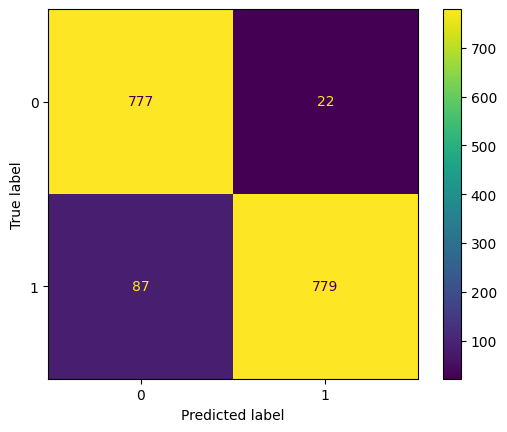

In [33]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdE= En_Offen_span_1etg(**En_Hypm_vsb.best_params_)
En_Offen_span_MdE.fit(En_Offen_span_1xr, En_Offen_span_1yr)

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdE.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

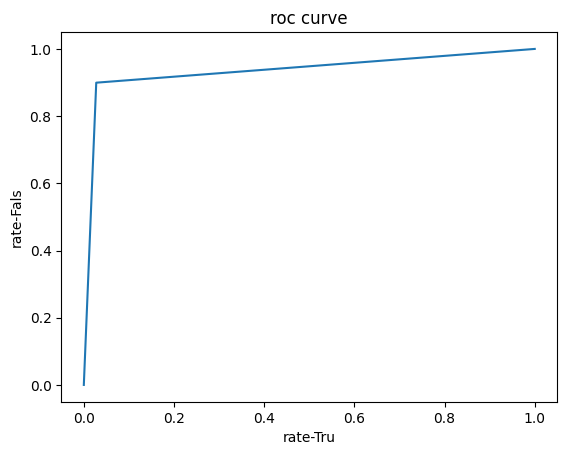

auc- curve: 0.9360018441065188


In [34]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       812
           1       0.97      0.90      0.93       854

    accuracy                           0.93      1666
   macro avg       0.93      0.93      0.93      1666
weighted avg       0.94      0.93      0.93      1666


 testing duration: 2.0967631340026855 



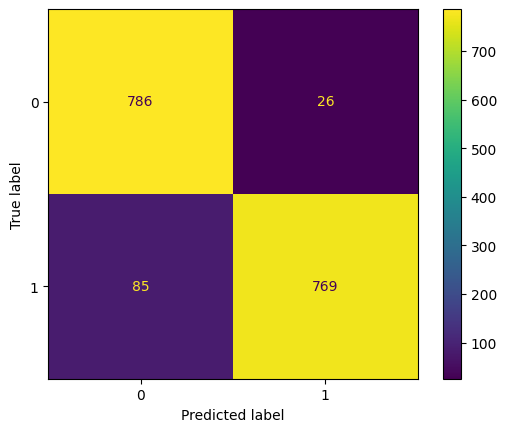

In [35]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdE.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

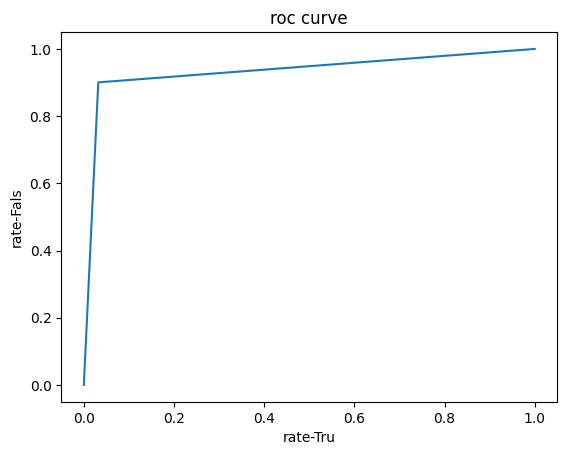

auc- curve: 0.934224339820722


In [36]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))